## In-class practice for Lecture 19

* Geopandas dataframe, mapping
* New Python tricks: merge of data frames, geopandas plotting
* Answer each question using Python codes in a separate cell
* name your ipynb file as Practice_18_YourName_UiD.ipynb
* After the class, upload your ipynb file to https://www.dropbox.com/request/4AoQvnXgLZOs7VSV2JJ1
* Deadline for uploading: 4:00 pm, Apr-13, 2021 (Tuesday) 

### Who's the fattest country in the world (with population > 1M)?

Download the datafile named "bmi.csv" from Moodle, use the geodataframe "world" discussed in the Lecture notes, and do the following analysis:

- load the country geoDataFrame "world" as used in the lecture notes: **world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))**, this geoDataFrame has all the geometric shape information of countries in the world, together with population (pop_est) and GDP (gdp_md_est) info;
- filter the geoDataFrame with population greater than 1M (e.g., only keep countries in the data frame with pop_est > 1,000,000);
- load the bmi.csv file as a Pandas data frame, take a look at the data frame (know exactly what column data you have!);
- for the bmi data frame, only keep the bmi data for year 2016;
- now merge the bmi data frame with the geodataframe "world" (make sure you have exactly the same column index for merging);
- map the bmi index of each country (year 2016) into a world map, using an orange-red color;
- make a colored world map with the "jet" colormap for the BMI distributions;
- who is the fatest country in the world? 
- [**Optional**] is that a linear correlation between the mean BMI index and GDP per capita?

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import geopandas as gpd
import mapclassify.classifiers as classifiers

import warnings 
warnings.filterwarnings("ignore") # ignore warning messages

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import cm

In [98]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

world = world[(world.pop_est>1000000)]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est*1e6

bmi = pd.read_csv("bmi.csv")
bmi = bmi.dropna()
bmi_2006 = bmi[bmi.Year == 2006]
bmi_2006.head()

world.rename(columns= {"iso_a3" : "Code"}, inplace=True)
bmi_world = world.merge(bmi_2006, on='Code', how = 'inner')

bmi_world.head()


,pop_est,continent,name,Code,gdp_md_est,geometry,gdp_per_cap,Entity,Year,Mean BMI (male)
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2791.425209,Tanzania,2006,22.074046
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",46991.214832,Canada,2006,27.261991
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",56823.436824,United States,2006,28.433046
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",24826.615166,Kazakhstan,2006,25.617843
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",6800.260810,Uzbekistan,2006,25.253492


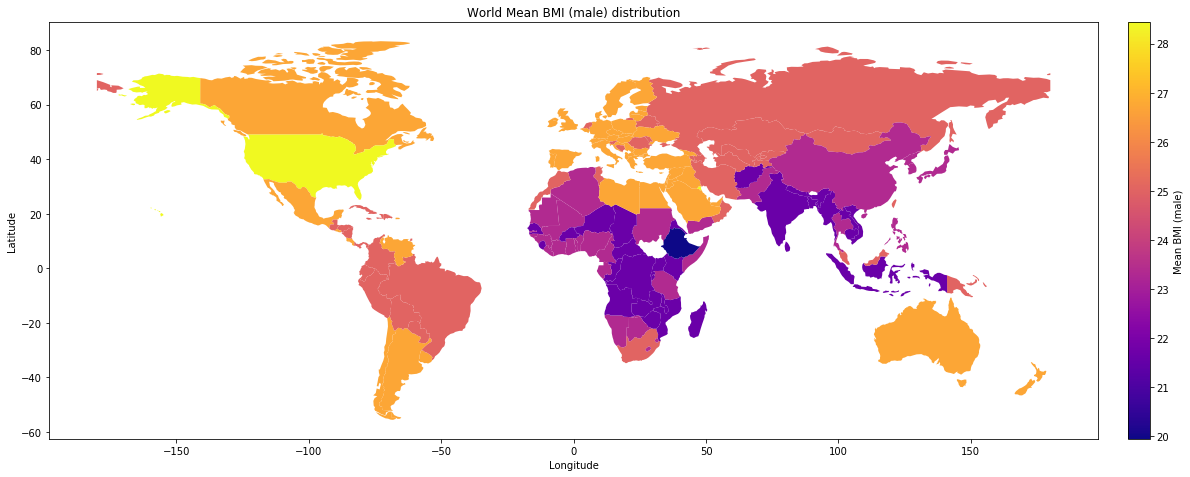

In [68]:
ax = bmi_world.plot(figsize=(20,16), column='Mean BMI (male)', cmap='plasma', scheme='userdefined', \
                    classification_kwds=dict(bins=[0, 18, 20, 22, 24, 26, 28, 30]), legend=False)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('World Mean BMI (male) distribution')

norm = Normalize(vmin = bmi_world['Mean BMI (male)'].min(),vmax = bmi_world['Mean BMI (male)'].max())
n_cmap = cm.ScalarMappable(norm = norm, cmap = 'plasma')
n_cmap.set_array([])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)
bar = ax.get_figure().colorbar(n_cmap,ax=ax,cax=cax)
bar.set_label('Mean BMI (male)')

In [69]:
# US seems to be the fattest country based on the above map/data

Text(0.5, 1.0, 'Mean BMI (male) vs GDP_per_cap')

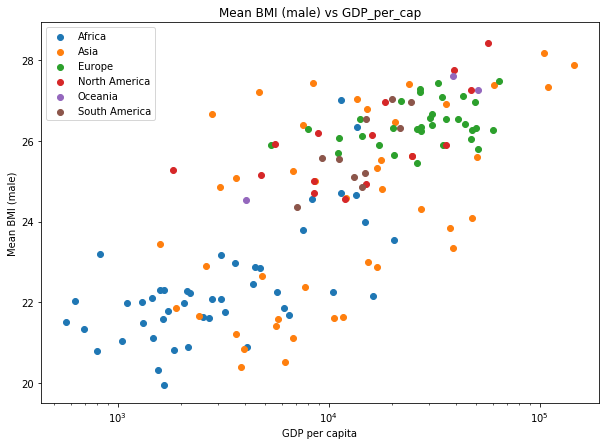

In [107]:
plt.figure(figsize=(10,7))
for i in np.unique(bmi_world.continent):
    plt.scatter(bmi_world.gdp_per_cap[bmi_world.continent == i] , bmi_world['Mean BMI (male)'][bmi_world.continent == i], \
               label = i)

plt.xscale('log')
plt.legend()
plt.xlabel("GDP per capita")
plt.ylabel("Mean BMI (male)")
plt.title('Mean BMI (male) vs GDP_per_cap')

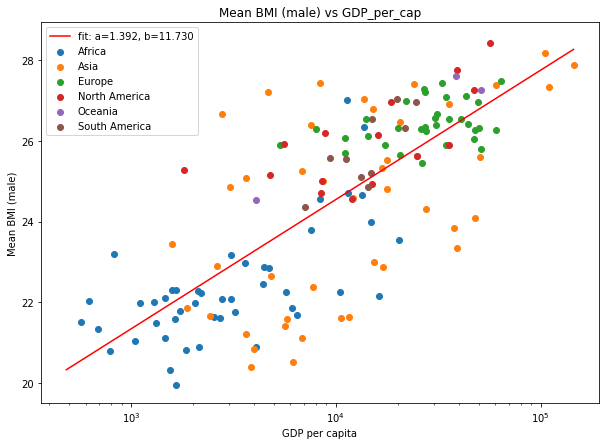

In [119]:
from scipy.optimize import curve_fit # import function curve_fit

# define a linear function
def func_loglinear(x, a, b):
    return a * np.log(x) + b

popt, pcov = curve_fit(func_loglinear, (bmi_world.gdp_per_cap), bmi_world['Mean BMI (male)'])

x=np.linspace(0,np.max(bmi_world.gdp_per_cap),300)

plt.figure(figsize=(10,7))
for i in np.unique(bmi_world.continent):
    plt.scatter(bmi_world.gdp_per_cap[bmi_world.continent == i] , bmi_world['Mean BMI (male)'][bmi_world.continent == i], \
               label = i)

plt.xscale('log')
plt.xlabel("GDP per capita")
plt.ylabel("Mean BMI (male)")
plt.title('Mean BMI (male) vs GDP_per_cap')
plt.plot(x, func_loglinear(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()